Data Acquisition

In [55]:
import requests
from bs4 import BeautifulSoup

def scrape_headlines(url):
    """Scrapes news headlines from a given website URL and returns them as a list.

    Args:
        url (str): The URL of the website to scrape.

    Returns:
        list: A list of headlines extracted from the website, or an empty list if an error occurs.
    """

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        headlines = []
        for heading_tag in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
            headlines.extend(soup.find_all(heading_tag))

        headline_text = [headline.text.strip() for headline in headlines]
        return headline_text

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return []

if __name__ == "__main__":
    target_url = input("Enter the website URL to scrape: ")
    headlines_list = scrape_headlines(target_url)
    headlines_list = headlines_list[20::]
    print(headlines_list)

# using https://finance.yahoo.com/news/

Enter the website URL to scrape: https://finance.yahoo.com/news/
['Russia raises forecast for 2024 oil, gas export revenues by $17.4 billion', 'US Gulf Coast-bound fuel oil cargoes hit 5-yr low as refinery demand weakens', 'How steelworkers are gambling on politics to block — or improve — the Nippon-US Steel deal', 'S&P 500 Heads Toward Worst Week Since March 2023: Markets Wrap', 'Nvidia stock tanks 5% amid rough week for chip stocks', 'Florida Boomtown Borrows $65 Million to Help Fix Bursting Jail', 'Why Gitlab Stock Rallied This Week', 'Analysts adjust Bookings.com stock price target on travel market', "Stocks Tumble On Jobs Data, Nasdaq 100 Eyes Worst Week In 2 Years As Semiconductors Slump: What's Driving Markets Friday?", '1 Wall Street Team Thinks Super Micro Computer Stock Is Going to $438. Is It Time to Sell?', 'Why Nvidia Stock Is Plummeting Again Today', 'Buy British stocks, says Goldman Sachs', 'Spectrum Brands (NYSE:SPB) Q2 Earnings: Leading The Household Products Pack', 'Q

Load Tokenizer and Model

In [56]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Tokenize

In [57]:
import torch
def get_sentiment(headline):
    inputs = tokenizer(headline, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = torch.argmax(probs, dim=1).item()  # 0: Negative, 1: Neutral, 2: Positive
    return sentiment

Apply sentiment analysis

In [62]:
sentiment_list = [];
for headline in headlines_list:
    sentiment = get_sentiment(headline)
    sentiment_list.append(sentiment);
    print(f"Headline: {headline}\nSentiment: {sentiment}\n")

Headline: Russia raises forecast for 2024 oil, gas export revenues by $17.4 billion
Sentiment: 1

Headline: US Gulf Coast-bound fuel oil cargoes hit 5-yr low as refinery demand weakens
Sentiment: 2

Headline: How steelworkers are gambling on politics to block — or improve — the Nippon-US Steel deal
Sentiment: 0

Headline: S&P 500 Heads Toward Worst Week Since March 2023: Markets Wrap
Sentiment: 0

Headline: Nvidia stock tanks 5% amid rough week for chip stocks
Sentiment: 0

Headline: Florida Boomtown Borrows $65 Million to Help Fix Bursting Jail
Sentiment: 0

Headline: Why Gitlab Stock Rallied This Week
Sentiment: 0

Headline: Analysts adjust Bookings.com stock price target on travel market
Sentiment: 0

Headline: Stocks Tumble On Jobs Data, Nasdaq 100 Eyes Worst Week In 2 Years As Semiconductors Slump: What's Driving Markets Friday?
Sentiment: 2

Headline: 1 Wall Street Team Thinks Super Micro Computer Stock Is Going to $438. Is It Time to Sell?
Sentiment: 0

Headline: Why Nvidia Stoc

COnverting to categorical labels

In [67]:
sentiment_list = [s - 1 for s in sentiment_list]
sentiment_label = []
for sentiment in sentiment_list:
  if sentiment == -1:
    sentiment_label.append('negative')
  elif sentiment == 0:
    sentiment_label.append('neutral')
  elif sentiment == 1:
    sentiment_label.append('positive')

#Visualisation

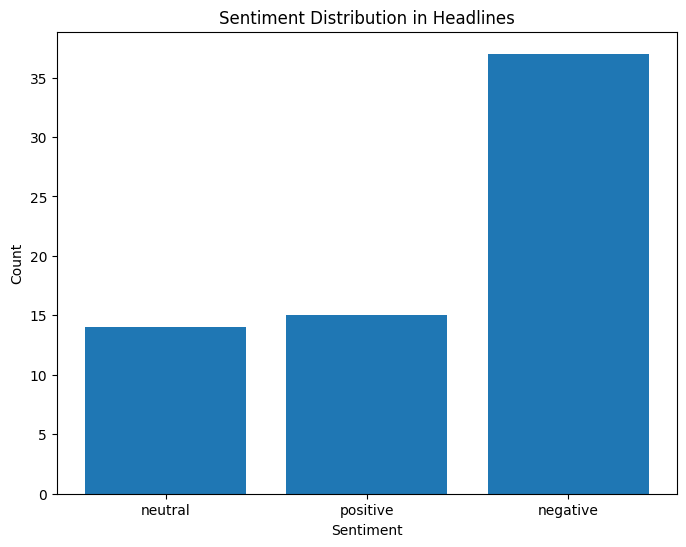

In [71]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each sentiment label
sentiment_counts = Counter(sentiment_label)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Headlines')
plt.show()

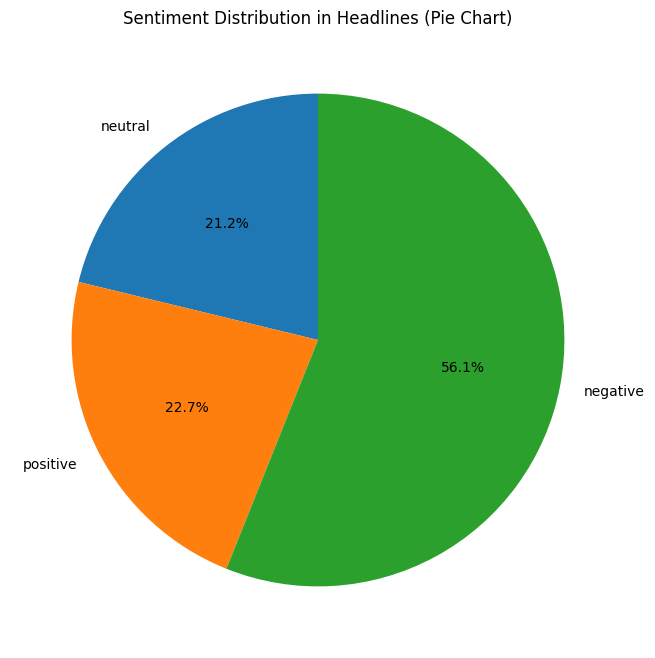

In [72]:
import seaborn as sns

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution in Headlines (Pie Chart)')
plt.show()


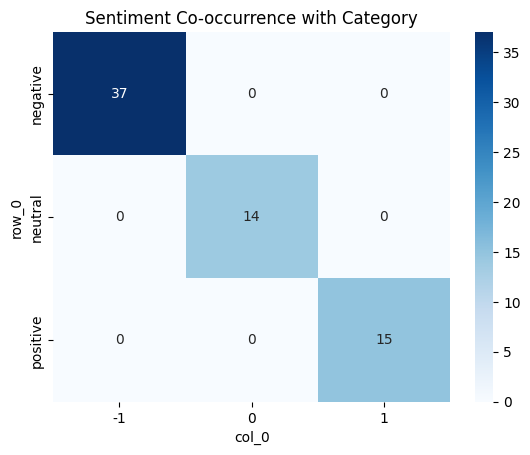

In [73]:
import pandas as pd

# Example: Heatmap of sentiment co-occurrence with some other categorical variable 'category'
category_sentiment = pd.crosstab(sentiment_label, sentiment_list)
sns.heatmap(category_sentiment, annot=True, cmap='Blues')
plt.title('Sentiment Co-occurrence with Category')
plt.show()

In [ ]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 51.7 MB/s eta 0:00:00


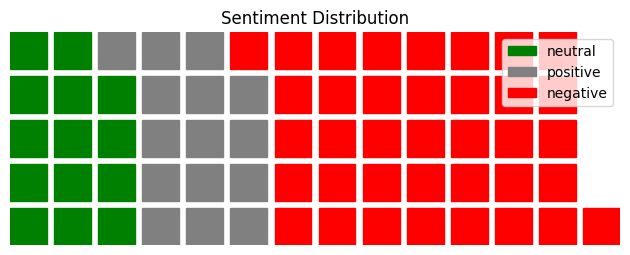

In [74]:
from pywaffle import Waffle

# Waffle chart
data = Counter(sentiment_label)
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=["green", "gray", "red"],
    title={'label': 'Sentiment Distribution', 'loc': 'center'},
)
plt.show()


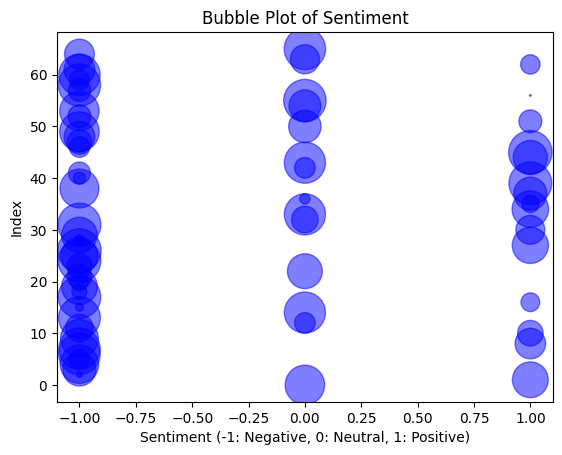

In [75]:
import numpy as np

# Example: random size for bubbles
sizes = np.random.rand(len(sentiment_label)) * 1000  # Replace with actual size data

# Bubble plot
plt.scatter(sentiment_list, range(len(sentiment_list)), s=sizes, alpha=0.5, color='blue')
plt.xlabel('Sentiment (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Index')
plt.title('Bubble Plot of Sentiment')
plt.show()
